In [1]:
import newdetrender as ndt
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
star = [176872276]

In [3]:
lctest, statstest = ndt.detrend_data(star)

starting dl for target: 176872276
found 12 files
working on: LightCurves/tess2018206045859-s0001-0000000176872276-0120-s_lc.fits
working on: LightCurves/tess2018234235059-s0002-0000000176872276-0121-s_lc.fits
working on: LightCurves/tess2018263035959-s0003-0000000176872276-0123-s_lc.fits
working on: LightCurves/tess2018292075959-s0004-0000000176872276-0124-s_lc.fits
working on: LightCurves/tess2018349182459-s0006-0000000176872276-0126-s_lc.fits
working on: LightCurves/tess2019006130736-s0007-0000000176872276-0131-s_lc.fits
working on: LightCurves/tess2019032160000-s0008-0000000176872276-0136-s_lc.fits
working on: LightCurves/tess2019058134432-s0009-0000000176872276-0139-s_lc.fits
working on: LightCurves/tess2019085135100-s0010-0000000176872276-0140-s_lc.fits
working on: LightCurves/tess2019112060037-s0011-0000000176872276-0143-s_lc.fits
working on: LightCurves/tess2019140104343-s0012-0000000176872276-0144-s_lc.fits
working on: LightCurves/tess2019169103026-s0013-0000000176872276-0146-s

In [4]:
lc_idxtest = np.arange(0,len(lctest),1)
mytabletest = Table([lc_idxtest, statstest[0],statstest[1]], names =('lc_idx', 'star_id', 'sector'))
mytabletest

lc_idx,star_id,sector
int64,int32,int32
0,176872276,1
1,176872276,2
2,176872276,3
3,176872276,4
4,176872276,6
5,176872276,7
6,176872276,8
7,176872276,9
8,176872276,10


In [7]:
lctest4 = lctest[4].remove_outliers()

lctest5 = lctest[5].remove_outliers()

lctest6 = lctest[6].remove_outliers()

lctest7 = lctest[7].remove_outliers()

lctest8 = lctest[8].remove_outliers()

In [8]:
#sector 6
fluxtest_1 = lctest4.flux
flux_errtest_1 = lctest4.flux_err
timetest_1 = lctest4.time

#sector 7
fluxtest_2 = lctest5.flux
flux_errtest_2 = lctest5.flux_err
timetest_2 = lctest5.time

#sector 8
fluxtest_3 = lctest6.flux
flux_errtest_3 = lctest6.flux_err
timetest_3 = lctest6.time


#sector 9
fluxtest_4 = lctest7.flux
flux_errtest_4 = lctest7.flux_err
timetest_4 = lctest7.time

#sector 10
fluxtest_5 = lctest8.flux
flux_errtest_5 = lctest8.flux_err
timetest_5 = lctest8.time

In [9]:
print(len(fluxtest_1), len(flux_errtest_1), len(timetest_1))

14819 14819 14819


In [12]:
#create mask for sector 6
masktest_1 = (timetest_1 > 1490) & (timetest_1 < 1490.2)
masktest_1

array([False, False, False, ...,  True,  True,  True])

In [13]:
#create mask for sector 8
masktest_3 = (timetest_3 > 1518.1) & (timetest_3 < 1518.3)
masktest_3

array([False, False, False, ..., False, False, False])

In [15]:
#save masked arrays as NEW variables for sector 6
masked_timetest_1 = timetest_1[~masktest_1]
masked_fluxtest_1 = fluxtest_1[~masktest_1]
masked_flux_errtest_1 = flux_errtest_1[~masktest_1]

masked_timetest_3 = timetest_3[~masktest_3]
masked_fluxtest_3 = fluxtest_3[~masktest_3]
masked_flux_errtest_3 = flux_errtest_3[~masktest_3]

In [21]:
#normalize
cleaned_fluxtest_1 = masked_fluxtest_1 / np.mean(masked_fluxtest_1)
cleaned_flux_errtest_1 = masked_flux_errtest_1 / np.mean(masked_flux_errtest_1)
cleaned_timetest_1 = masked_timetest_1

cleaned_fluxtest_2 = fluxtest_2 / np.mean(fluxtest_2)
cleaned_flux_errtest_2 = flux_errtest_2 / np.mean(flux_errtest_2)
cleaned_timetest_2 = timetest_2

cleaned_fluxtest_3 = masktest_3 / np.mean(masked_fluxtest_3)
cleaned_flux_errtest_3 = masked_flux_errtest_3 / np.mean(masked_flux_errtest_3)
cleaned_timetest_3 = masked_timetest_3

cleaned_fluxtest_4 = fluxtest_4 / np.mean(fluxtest_4)
cleaned_flux_errtest_4 = flux_errtest_4 / np.mean(flux_errtest_4)
cleaned_timetest_4 = timetest_4

cleaned_fluxtest_5 = fluxtest_5 / np.mean(fluxtest_5)
cleaned_flux_errtest_5 = flux_errtest_5 / np.mean(flux_errtest_5)
cleaned_timetest_5 = timetest_5

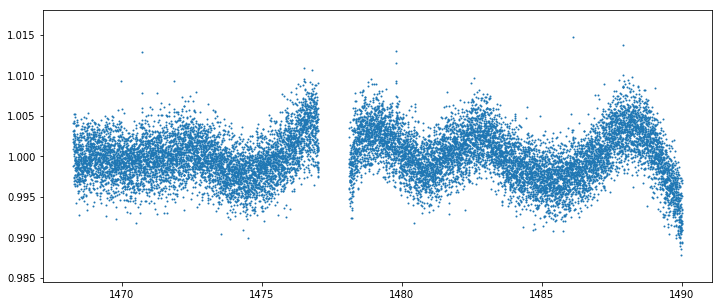

In [22]:
plt.figure(figsize = (12, 5))
plt.scatter(cleaned_timetest_1, cleaned_fluxtest_1, s = 1)